Introduction

In this project, we aim to determine the "best" neighborhood in Pittsburgh based on an aspect that many residents and potential residents value highly: safety. While safety can be measured in various ways, such as crime rates, accident reports, or emergency response times, the metric I will be specifically looking at is non-traffic citations.

The reasoning behind using non-traffic citations as a marker for safety is that such citations often reflect community adherence to local laws and regulations outside of driving behavior. High citation counts may indicate recurring violations or disturbances, suggesting a neighborhood may experience more public infractions. Conversely, lower citation counts might suggest a neighborhood with fewer non-traffic-related issues, potentially offering a safer and more orderly environment for residents.

This notebook presents my data-driven approach to identifying the best neighborhood, detailing the data sources, methodology, and findings associated with non-traffic citations. We believe that by evaluating neighborhoods through a lens of safety, we can provide meaningful insights into which areas of Pittsburgh offer a desirable living environment based on public behavior..

In [3]:
!pip install geopandas



   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   --------------------- ------------------ 174.1/323.6 kB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 323.6/323.6 kB 6.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   - -------------------------------------- 0.6/16.2 MB 19.2 MB/s eta 0:00:01
   -- ------------------------------------- 1.1/16.2 MB 14.3 MB/s eta 0:00:02
   --- ------------------------------------ 1.5/16.2 MB 10.3 MB/s eta 0:00:02
   --- ------------------------------------ 1.5/16.2 MB 10.3 MB/s eta 0:00:02
   ---- ----------------------------------- 2.0/16.2 MB 9.0 MB/s eta 0:00:02
   ------ --------------------------------- 2.6/16.2 MB 9.6 MB/s eta 0:00:02
   ------- -------------------------------- 3.0/16.2 MB 10.0 MB/s eta 0:00:02
   ------- -------------------------------- 3.0/16.2 MB 9.1 MB/s eta 0:00:02
   --------- ------------------------------ 3.7/16.2 MB 9.3 MB/s eta 0:00:02
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16295 entries, 0 to 16294
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    16295 non-null  int64  
 1   PK                     16295 non-null  int64  
 2   CCR                    16295 non-null  object 
 3   GENDER                 16232 non-null  object 
 4   RACE                   16214 non-null  object 
 5   AGE                    16223 non-null  float64
 6   CITEDTIME              16295 non-null  object 
 7   INCIDENTLOCATION       16295 non-null  object 
 8   OFFENSES               16295 non-null  object 
 9   NEIGHBORHOOD           15379 non-null  object 
 10  ZONE                   16295 non-null  object 
 11  INCIDENTTRACT          15383 non-null  object 
 12  COUNCIL_DISTRICT       14453 non-null  float64
 13  PUBLIC_WORKS_DIVISION  14453 non-null  float64
 14  X                      14493 non-null  float64
 15  Y 

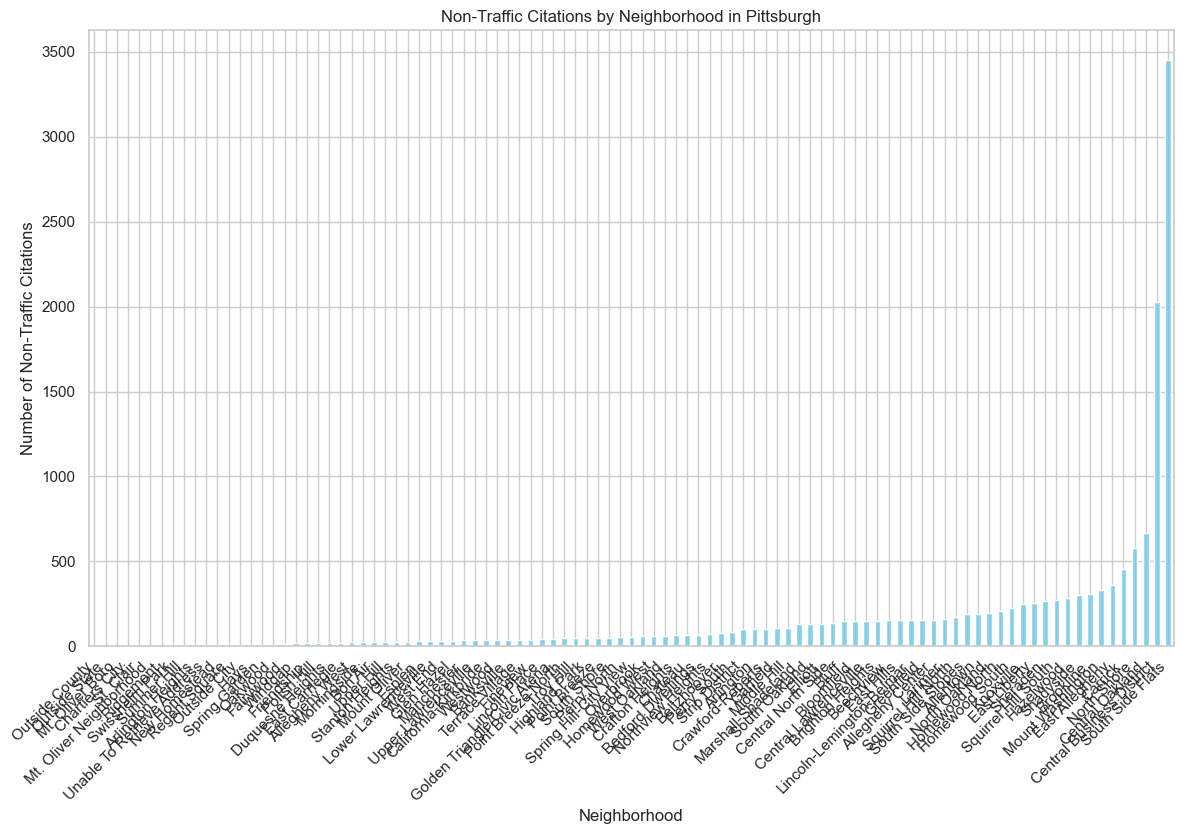

In [9]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Load the dataset
url = "https://data.wprdc.org/datastore/dump/6b11e87d-1216-463d-bbd3-37460e539d86"
df = pd.read_csv(url)

# Display basic information about the dataset
df.info()
df.head()

# Select the relevant column for analysis
df = df[['NEIGHBORHOOD']]

# Drop rows with missing values in the 'NEIGHBORHOOD' column
df.dropna(subset=['NEIGHBORHOOD'], inplace=True)

# Count the number of citations per neighborhood
citation_counts = df['NEIGHBORHOOD'].value_counts()

# Display neighborhoods with the fewest citations (assumed to be the "best" neighborhoods)
print("Top neighborhoods by least citations:")
print(citation_counts.nsmallest(10))

# Plot citation counts by neighborhood
plt.figure(figsize=(14, 8))
citation_counts_sorted = citation_counts.sort_values()
citation_counts_sorted.plot(kind='bar', color='skyblue')
plt.title("Non-Traffic Citations by Neighborhood in Pittsburgh")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Non-Traffic Citations")
plt.xticks(rotation=45, ha='right')
plt.show()


Minor Offenses (Weight 1):

Criminal Mischief
Alcohol Consumption


Moderate Offenses (Weight 2):

Smoking Marijuana
Possessing Marijuana


Serious Offenses (Weight 3):

Cruelty to Animals



Any offense not matching these specific categories is classified as 'OTHER' with a default weight of 0. This approach allows for a more sophisticated analysis that distinguishes between different types of citations, moving beyond simple count-based metrics to provide insight into the potential seriousness of citations across different neighborhoods.

Top neighborhoods with the fewest citations and their average severity:
                         Total Citations  Average Severity
NEIGHBORHOOD                                              
Outside County                         2          0.000000
Outside State                          2          0.500000
Chartiers City                         3          0.000000
Mt. Oliver Boro                        3          0.000000
St. Clair                              3          0.000000
Mt. Oliver Neighborhood                4          0.750000
Ridgemont                              4          0.000000
Swisshelm Park                         6          0.000000
Arlington Heights                      7          0.142857
Summer Hill                            7          0.000000


<Figure size 1600x1000 with 0 Axes>

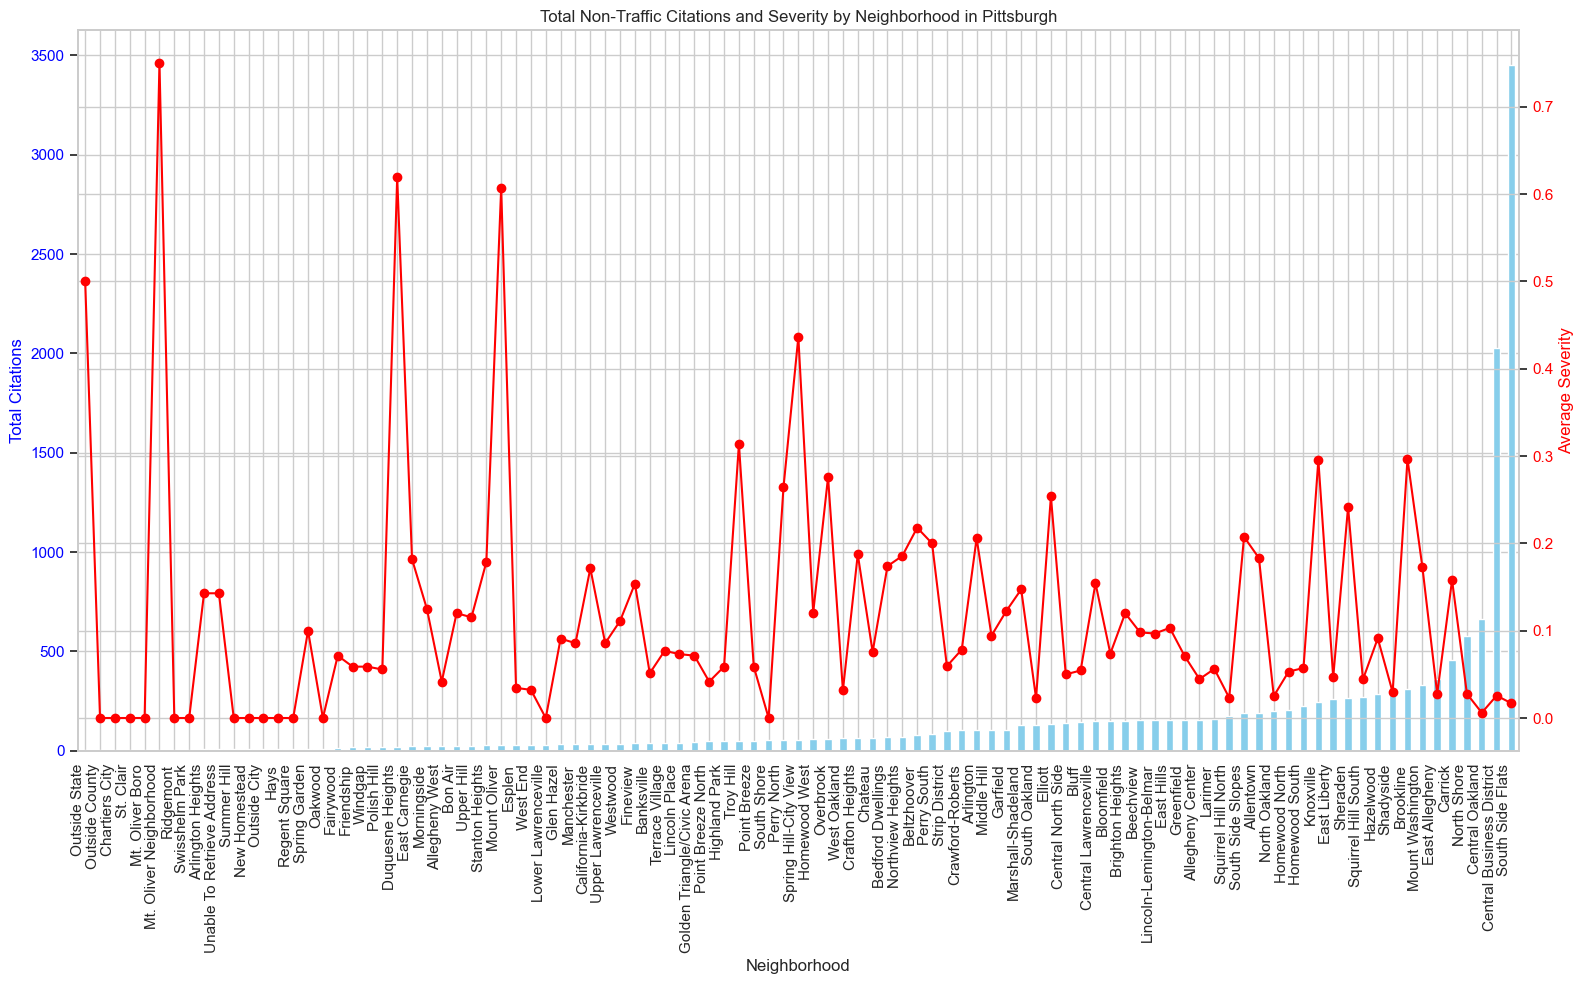

In [24]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Load the dataset
url = "https://data.wprdc.org/datastore/dump/6b11e87d-1216-463d-bbd3-37460e539d86"
df = pd.read_csv(url)

# Drop rows with missing values in the 'NEIGHBORHOOD' column
df.dropna(subset=['NEIGHBORHOOD'], inplace=True)

# Define weights for offense severity
weights = {
    'CRIMINAL MISCHIEF': 1,
    'SMOKING MARIJUANA': 2,
    'POSSESSING MARIJUANA': 2,
    'CRUELTY TO ANIMALS': 3,
    'ALCOHOL CONSUMPTION': 1,
}

# Function to categorize offenses
def categorize_offense(offense):
    for key in weights.keys():
        if key.upper() in offense.upper():
            return key
    return 'OTHER'

# Categorize offenses and assign severity
df['OFFENSE_CATEGORY'] = df['OFFENSES'].apply(categorize_offense)
df['SEVERITY'] = df['OFFENSE_CATEGORY'].map(weights).fillna(0)

# Count the number of citations per neighborhood
citation_counts = df['NEIGHBORHOOD'].value_counts()

# Calculate total citations and average severity per neighborhood
total_citations = df['NEIGHBORHOOD'].value_counts()
average_severity = df.groupby('NEIGHBORHOOD')['SEVERITY'].mean()

# Combine both metrics into a single DataFrame
neighborhood_stats = pd.DataFrame({
    'Total Citations': total_citations,
    'Average Severity': average_severity
}).dropna()

# Display neighborhoods with the fewest citations and their average severity
print("Top neighborhoods with the fewest citations and their average severity:")
print(neighborhood_stats.nsmallest(10, 'Total Citations'))

# Plot total citations by neighborhood with average severity as a secondary metric
plt.figure(figsize=(16, 10))
fig, ax1 = plt.subplots(figsize=(16, 10))

# Bar plot for total citations
sorted_neighborhoods = neighborhood_stats.sort_values('Total Citations')
sorted_neighborhoods['Total Citations'].plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_title("Total Non-Traffic Citations and Severity by Neighborhood in Pittsburgh")
ax1.set_xlabel("Neighborhood")
ax1.set_ylabel("Total Citations", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=90, ha='right')

# Line plot for average severity
ax2 = ax1.twinx()
sorted_neighborhoods['Average Severity'].plot(kind='line', color='red', marker='o', ax=ax2)
ax2.set_ylabel("Average Severity", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.tight_layout()
plt.show()

### ConclusionOur analysis of non-traffic citations offers a peek into Pittsburgh's neighborhood dynamics. Neighborhoods like Outside County and Chartiers City show surprisingly low citation rates, but these numbers tell only part of the story.
Think of citations like a report card for neighborhood behavior, but it's not that simple. Fewer citations could mean several things: fewer people, different policing styles, or just less crowded areas. Some neighborhoods, like Mt. Oliver, might have fewer citations, but the ones they do have could be more serious.
This data is like a puzzle piece – interesting, but not the whole picture. To truly understand a neighborhood's character, you'd need to look at more than just citation numbers. Factors like community spirit, local resources, and overall quality of life matter just as much.
So while our numbers give us a glimpse into neighborhood patterns, they're more of a conversation starter than a definitive verdict on which neighborhood is "best.".
